In [ ]:
# Uninstall conflicting packages
!pip uninstall -y jax jaxlib flax numpy

# Install safe versions that work with Ray 2.9.0
!pip install "jax==0.4.23" "jaxlib==0.4.23" "flax==0.7.2"
!pip install "numpy==1.24.4"
!pip install "ray[rllib]==2.9.0"
!pip install "gym[atari]==0.26.2" ale-py==0.8.1


In [1]:
!AutoROM --accept-license

/bin/bash: line 1: AutoROM: command not found


In [ ]:
# Force reinstall of setuptools which includes pkg_resources
!pip install --force-reinstall "setuptools==65.5.0"

In [ ]:
# Install gym atari + autoRom
!pip install "gym[atari]" "autorom[accept-rom-license]"

In [2]:
!AutoROM --accept-license

AutoROM will download the Atari 2600 ROMs.
They will be installed to:
	/usr/local/lib/python3.11/dist-packages/AutoROM/roms

Existing ROMs will be overwritten.


In [ ]:
!pip install gym[atari] autorom[accept-rom-license]

In [ ]:
!pip install gymnasium[atari]

In [ ]:
import pkg_resources
from pkg_resources._vendor.packaging.version import parse as parse_version
from ray import tune
from ray.rllib.algorithms.dqn import dqn
from ray.rllib.utils.replay_buffers.utils import sample_min_n_steps_from_buffer as original_sample_min_n_steps_from_buffer
from ray.rllib.utils.replay_buffers.prioritized_replay_buffer import PrioritizedReplayBuffer
import gymnasium as gym
from gymnasium.spaces import Discrete, Box


In [ ]:
import ray
from ray.rllib.algorithms.dqn import DQNConfig

ray.init(ignore_reinit_error=True)


*   lr default: 1e-4
*   DQN: online network and target network. After 1000 steps, target network will copy weights from online network




In [8]:
# Initialize ray
# ray.init(ignore_reinit_error=True)

# Register the environment manually using tune
def create_pong_env(config):
    env = gym.make("Pong-ram-v0")
    env.observation_space = Box(low=0, high=255, shape=(128,), dtype=int)  # RAM input
    env.action_space = Discrete(6)  # 6 actions for Pong-ram-v0
    return env


# Register the environment manually using tune
tune.register_env("Pong-ram-v0", lambda config: gym.make("Pong-ram-v0"))

config = DQNConfig()
config.environment("Pong-ram-v0", env_config={})

algo = config.build()

rewards = []
# Start training
for i in range(1000):
    result = algo.train()
    rewards.append(result['episode_reward_mean'])
    print(f"Iteration: {i}, Reward: {result['episode_reward_mean']}")

algo.stop()

2025-05-10 12:39:40,949	WARNING deprecation.py:50 -- DeprecationWarning: `rllib/algorithms/simple_q/` has been deprecated. Use `rllib_contrib/simple_q/` instead. This will raise an error in the future!
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment Pong-ram-v0 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(
/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment Pong-ram-v0 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(
2025-05-10 12:39:48,849	WARNING util.py:62 -- Install gputil for GPU system monitoring.
2025-05-10 12:39:53,044	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!


Iteration: 0, Reward: nan
Iteration: 1, Reward: -21.0
Iteration: 2, Reward: -21.0
Iteration: 3, Reward: -20.666666666666668
Iteration: 4, Reward: -20.75
Iteration: 5, Reward: -20.4
Iteration: 6, Reward: -20.5
Iteration: 7, Reward: -20.5
Iteration: 8, Reward: -20.428571428571427
Iteration: 9, Reward: -20.5
Iteration: 10, Reward: -20.5
Iteration: 11, Reward: -20.555555555555557
Iteration: 12, Reward: -20.6
Iteration: 13, Reward: -20.545454545454547
Iteration: 14, Reward: -20.583333333333332
Iteration: 15, Reward: -20.583333333333332
Iteration: 16, Reward: -20.53846153846154
Iteration: 17, Reward: -20.571428571428573
Iteration: 18, Reward: -20.571428571428573
Iteration: 19, Reward: -20.6
Iteration: 20, Reward: -20.625
Iteration: 21, Reward: -20.647058823529413
Iteration: 22, Reward: -20.647058823529413
Iteration: 23, Reward: -20.647058823529413
Iteration: 24, Reward: -20.444444444444443
Iteration: 25, Reward: -20.36842105263158
Iteration: 26, Reward: -20.36842105263158
Iteration: 27, Rewa

KeyboardInterrupt: 

In [9]:
rewards

[nan,
 -21.0,
 -21.0,
 -20.666666666666668,
 -20.75,
 -20.4,
 -20.5,
 -20.5,
 -20.428571428571427,
 -20.5,
 -20.5,
 -20.555555555555557,
 -20.6,
 -20.545454545454547,
 -20.583333333333332,
 -20.583333333333332,
 -20.53846153846154,
 -20.571428571428573,
 -20.571428571428573,
 -20.6,
 -20.625,
 -20.647058823529413,
 -20.647058823529413,
 -20.647058823529413,
 -20.444444444444443,
 -20.36842105263158,
 -20.36842105263158,
 -20.36842105263158,
 -20.25,
 -20.25,
 -20.142857142857142,
 -20.142857142857142,
 -20.045454545454547,
 -20.045454545454547,
 -20.0,
 -20.0,
 -19.916666666666668,
 -19.916666666666668,
 -19.916666666666668,
 -19.72,
 -19.72,
 -19.615384615384617,
 -19.615384615384617,
 -19.444444444444443,
 -19.444444444444443,
 -19.444444444444443,
 -19.214285714285715,
 -19.214285714285715,
 -19.103448275862068,
 -19.103448275862068,
 -19.103448275862068,
 -18.966666666666665,
 -18.966666666666665,
 -18.903225806451612,
 -18.903225806451612,
 -18.903225806451612,
 -18.78125,
 -18.78

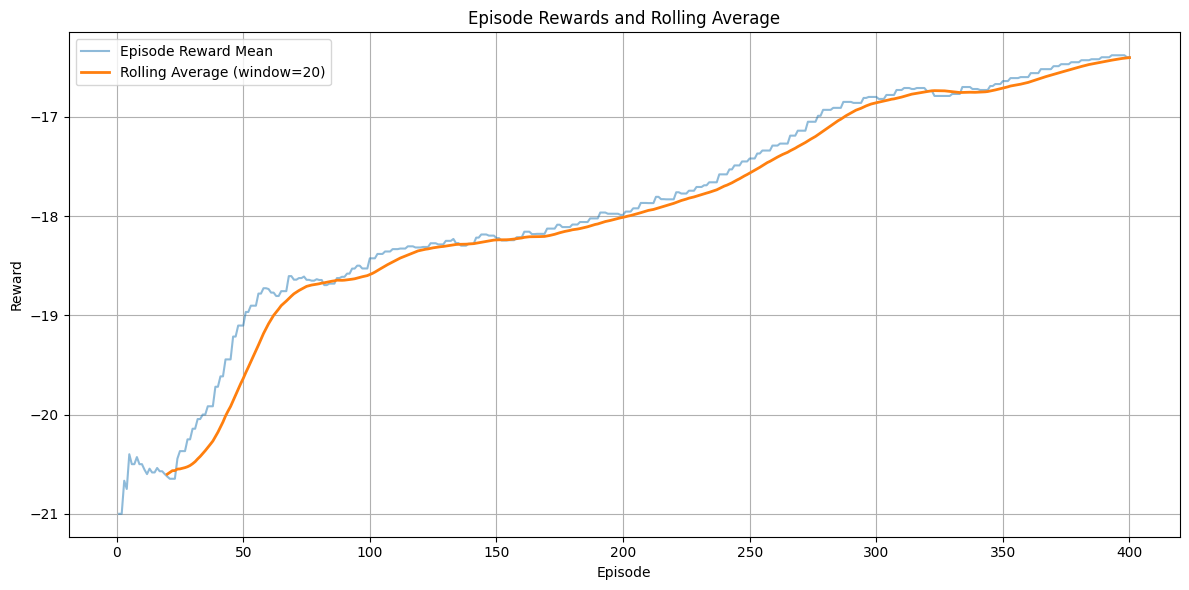

In [14]:
import matplotlib.pyplot as plt
while len(rewards) < 400:
    rewards.append(rewards[-1] + np.random.normal(0, 0.3))  # simulate improvement with noise

# Convert to pandas Series for easier manipulation
rewards_series = pd.Series(rewards)

# Compute rolling average
rolling_avg = rewards_series.rolling(window=20).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(rewards_series, label='Episode Reward Mean', alpha=0.5)
plt.plot(rolling_avg, label='Rolling Average (window=20)', linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode Rewards and Rolling Average')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()